In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

def save_data(X : pd.DataFrame, path:str):
    X.to_csv(path+".csv")
    X.to_excel(path+".xlsx")

In [2]:
df = pd.read_csv("Datas/selected_feature_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)

(38799, 7)


[]

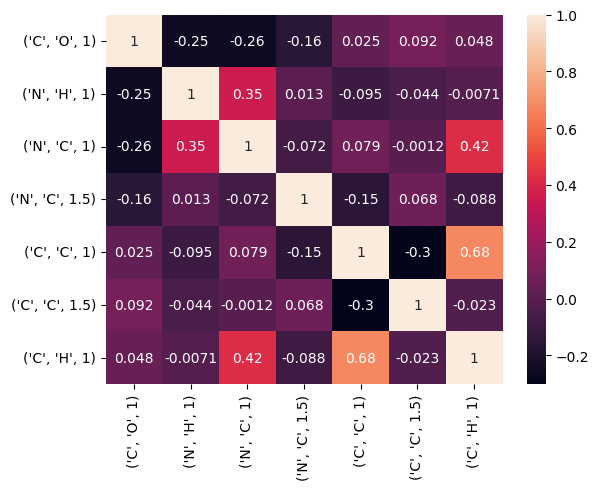

In [3]:
corr_df = df.corr()
save_data(corr_df, "Datas/correlation_data")
sns.heatmap(df.corr(), annot=True)
plt.savefig("Datas/Stats/correlation_heatmap.png")
plt.plot()

In [4]:
for columns in df.columns:
    bin = np.max(df[columns])
    sns.histplot(x = df[columns], kde=True, bins=bin)
    plt.savefig("Datas/Stats/Distribution/{}.png".format(columns))
    plt.clf()

<Figure size 640x480 with 0 Axes>